Es wird ersichtlich, dass Frau Prof. Dr. Back auf Twitter (wordcloud1) einerseits vermehrt Tweets über Unternehmen/Betriebe schreibt und andererseits die Plattform hauptsächlich für soziale Interaktion in Form von bspw. Danksagungen oder Reaktionen/Aufmerksammachen auf Videos nutzt. In starkem Kontrast zu ihren Tweets erscheint der News-Blog (wordcloud2) weitaus weniger "sozial". Begriffe wie "IOT", "Mobile", "Mobile Business" oder "Smart iot" wurden in ihm am häufigsten verwendet. Die dritte Wordcloud (wordcloud3) vereint alle erhobenen Tweets (seit dem 01.01.2010) und News-Blog Einträge. Über alle Beiträge hinweg wurde neben "Video" der Begriff "Mobile business" am häufigsten genannt. Aus der Grafik kann zudem abgeleitet werden, dass in Wörtern messbare soziale Interaktionen (wie Danksagungen, Reaktionen/Empfehlungen) genauso häufig auftreten wie Beiträge über "IOT" und "Mobile". In den Auswertungen wurden einerseits deutsche Stopwords aus dem nltk und andererseits weitere Wörter wie "via", "die" oder "hier" entfernt.

In [1]:
!pip install wordcloud

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import re
import nltk

nltk.download('stopwords')

df10 = pd.read_json("/Users/julianalexander/Desktop/FlemmingJulian.json", lines = True)
df10 = df10[["id", "tweet"]]                                                                                                            

df20 = pd.read_csv ("/Users/julianalexander/Desktop/FlemmingJulian2.csv")
df20 = df20[["Titel", "Inhalt"]]
df20.columns = ["Titel", "Inhalt"]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/julianalexander/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from nltk.corpus import stopwords
stop = stopwords.words('german')
df11 = df10["tweet"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))
df21 = df20["Inhalt"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))

In [3]:
df12 = df11.str.cat(sep='-- ').replace(",", "")
df22 = df21.str.cat(sep='-- ').replace(",", "")

In [4]:
df13 = re.sub(r'http\S+', '', df12)
df23 = re.sub(r'http\S+', '', df22)

In [10]:
word_list = ['via', 'die', 'hier', 'mehr', 'kolumne', 'da ', 'ich', 'ja', 'hier', 
             'schon', 'e ', 'geht', 'rt', 'gibt', 'auch', 'für', 'ein', 'wie', 'ist', 'mal', 'e', 'der', 'da', 'sie',
            's', 'amp', ' da', 'heute', ' e', 'web']
  
repl_wrd = ''

df14 = ' '.join([repl_wrd if idx in word_list else idx for idx in df13.split()])
df24 = ' '.join([repl_wrd if idx in word_list else idx for idx in df23.split()]) 

In [11]:
df25 = df14 + df24

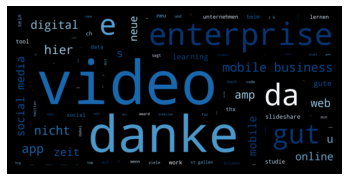

In [12]:
wordcloud1 = WordCloud(width=2000, height=1000, margin=100,
                      colormap='Blues').generate(df14)

plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

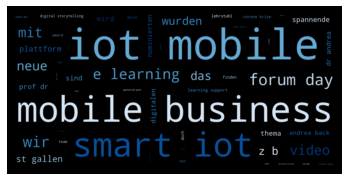

In [13]:
wordcloud2 = WordCloud(width=2000, height=1000, margin=100,
                      colormap='Blues').generate(df24)

plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

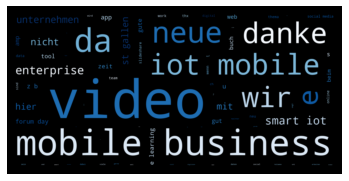

In [14]:
wordcloud3 = WordCloud(width=2000, height=1000, margin=100,
                      colormap='Blues').generate(df25)

plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()